## 1. Contexto
En este conjunto de datos relacionados con los pingüinos implica examinar y visualizar los patrones y relaciones presentes en los datos. A continuacion, se busca respuesta a las siguientes preguntas:

    1. ¿Cual es la vida promedio de un pinguino?
    2. ¿Viven as las hembras o los machos?
    3. ¿La altura es un rasgo distintivo del sexo?
    4. ¿Cual es la proporción altura/ancho de los picos?
    5. ¿Qué tipo de datos son las variables del conjunto de datos?
    6. ¿Cuantas variables de cada tipo de dato tenemos en el conjunto de datos?
    7. ¿Cuantas observaciones y variables tenemos en el conjunto de datos?
    8. ¿Existen valores nulos explícitos en el conjunto de datos?
    9. ¿De tener observaciones con valores nulos? ¿Cuántas tenemos por cada variable?
    10. ¿Cuantos valores nulos tenemos en el total en el conjunto de datos?


## 2. El dataset
La informacion recolectada se encuentra en un archivo CSV (penguins), contiene 344 filas y 9 columnas. Despues de la limpieza veremos si se reducen las filas y/o la columnas de nuestro dataset.

## 3. Primer vistazo al dataset


In [47]:
# Importamos librerias/modulos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo el dataset
ruta = "../data/penguins.csv"
data = pd.read_csv(ruta)

# Mostra el dataset
print(data.shape)
data.head()

(344, 9)


,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## 4. Limpieza del dataset
Se realizara el proceso de limpieza teniendo en cuenta las siguietnes situaciones comunes:

    1. Datos faltantes en algunas celdas.
    2. Columnas irrelevantes (ques no corresponden al problema que queremos resolver)
    3. Registros (filas) repetidos.
    4. Valores extremos (outliers) en el caso de las variables numericas. Se deben analizar en detalle pues no necesariamente la soulucion es eliminarlos.
    5. Errores tipograficos en el caso de las variabe categoriccas.

Se supone que, al final de este proceso de limpieza deberiamos tener un set de datos
integro, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes
Aqui damos comienzo a los puntos anteriormente mencionados. El numero total de filas son 344 y 9 columnas hasta el momento.

In [48]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 26.0+ KB


## 4.2 Columnas irrelevantes
Una columnas irrelenvante contiene:

    1. No contienen informcion relevante para el problema que queremos resolver.
    2. Una columnas categoria pero con un solo nivel.
    3. Una columna numerica pero con un solo valor.
    4. Columnas con informacion redundante.

Pero si se tiene dudas sobre una columnas puede ser relevante o no, lo mejor es dejarla,
y mas adelante en las sigueintes etapas, podremos darnos cuenta de si se preserva o no.

Todas las columnas categoricas, tienen que tener mas de un subnivel. Local no se elemina ninguna.


In [49]:
# Conteo de niveles en las diferentes columnas categoricas
columnas_categoricas = ['species', 'island', 'sex']

for col in columnas_categoricas:
    print(f"Columna {col}: {data[col].nunique()} subniveles")

Columna species: 3 subniveles
Columna island: 3 subniveles
Columna sex: 2 subniveles


In [50]:
# Veamos que ocurren con las columnas numericas
data.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,174.324324,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,98.386547,5.468668,1.969235,14.015765,805.215802,0.812944
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,90.000000,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,173.000000,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,259.000000,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


Como se muestra, hay 6 columnas que tienen desviacion estandar (std) diferentes de cero, lo que indica que no tienen un unico valor.

## 4.3 Filas repetidas


In [51]:
print(f"Volumen del dataset antes de eliminar filas repetidas: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"Volumen del dataset despues de eliminar filas repetidas: {data.shape}")

Volumen del dataset antes de eliminar filas repetidas: (333, 9)
Volumen del dataset despues de eliminar filas repetidas: (333, 9)


Como vemos, no hay filas repetidas, por ende, se mantienen las 344 filas y las 9 columas intactas.

## 4.4 Outliers (valores extremos) en variables numericas
No siempre se deben eliminar los Outliers porque dependiendo de la variable numérica analizada estos pueden contener informacion importante. Aqui pedemos usar algo asi como el sentido comun, dependiendo de nuestras varaibles.

C:\Users\josetorres\AppData\Local\Temp\ipykernel_15048\328058415.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\josetorres\AppData\Local\Temp\ipykernel_15048\328058415.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\josetorres\AppData\Local\Temp\ipykernel_15048\328058415.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
C:\Users\josetorres\AppData\Local\Temp\ipykernel_15048\328058415.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xt

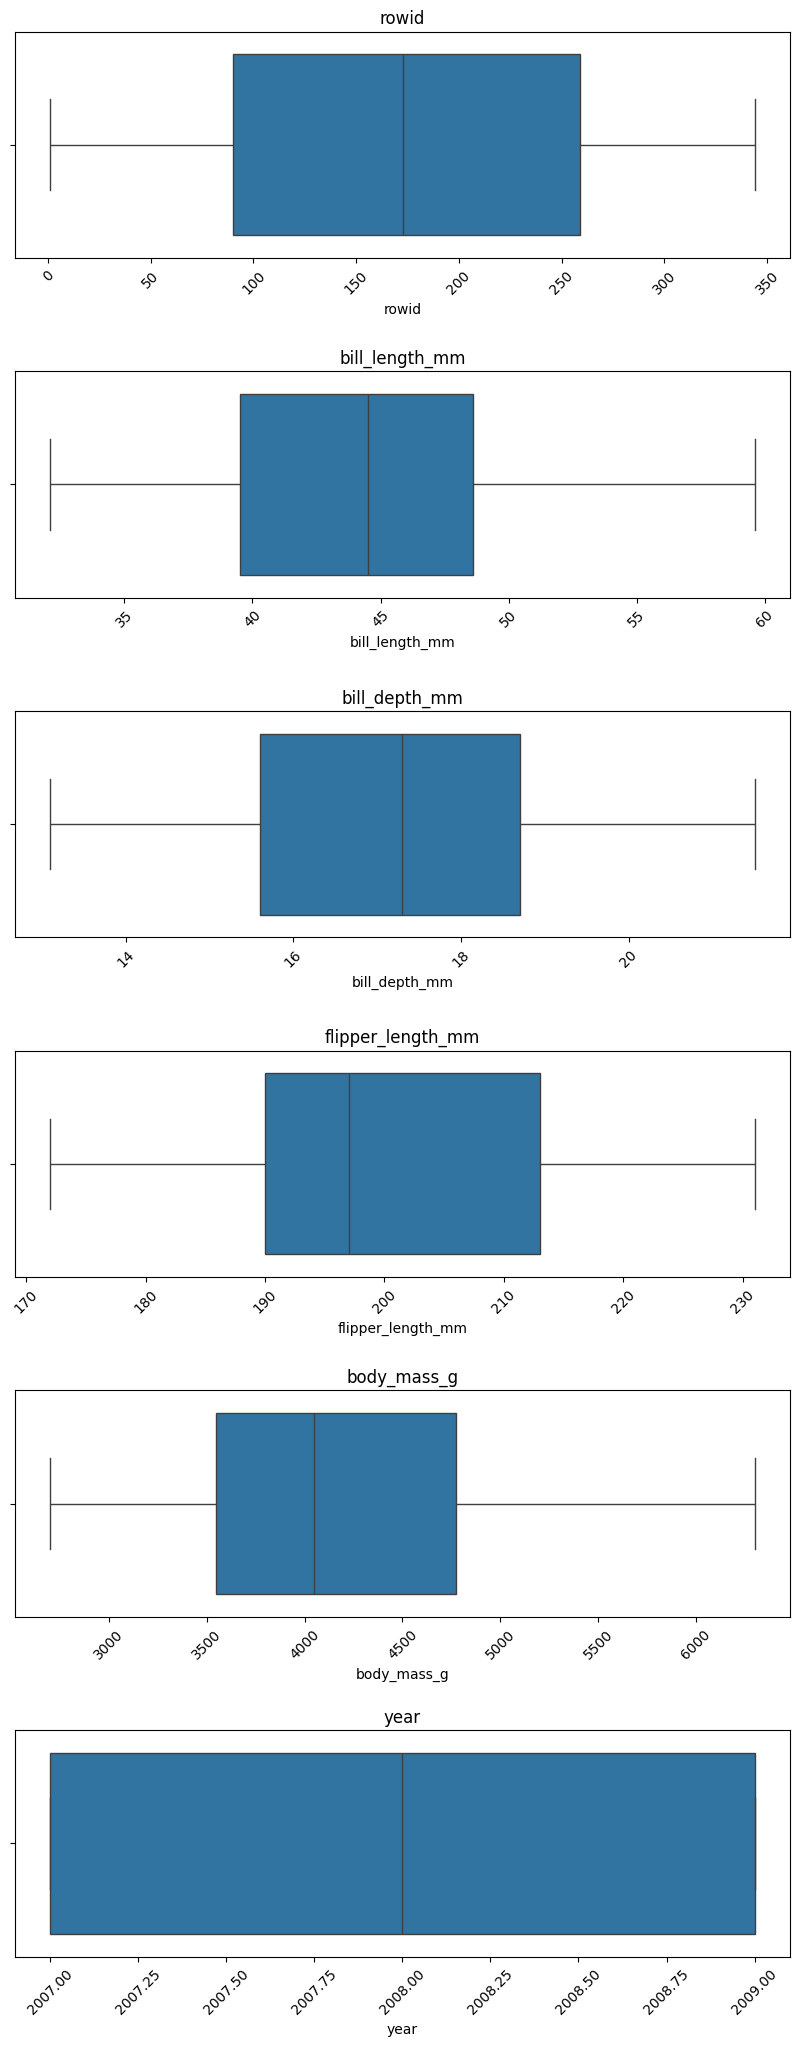

In [52]:
# Generamos graficas individuales para las variable numericas, pues estas
# tienen rangos diferentes
columnas_numericas = ['rowid', 'bill_length_mm',
                      'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(10, 25))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

**Observaciones:** Por lo que vemos es un dataset que no contiene outliers, por ende, no se elimina ninguna fila.

## 4.5 Errores tipograficos en variables categoricas
En una variable categorica pueden aparecer subniveles que sen lo mismo, una palabra completa, mayusculas y/o vrebiaturas, y que pueden ser lo mismo, por ejemplo, div y division. 

C:\Users\josetorres\AppData\Local\Temp\ipykernel_15048\2744262179.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\josetorres\AppData\Local\Temp\ipykernel_15048\2744262179.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)
C:\Users\josetorres\AppData\Local\Temp\ipykernel_15048\2744262179.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


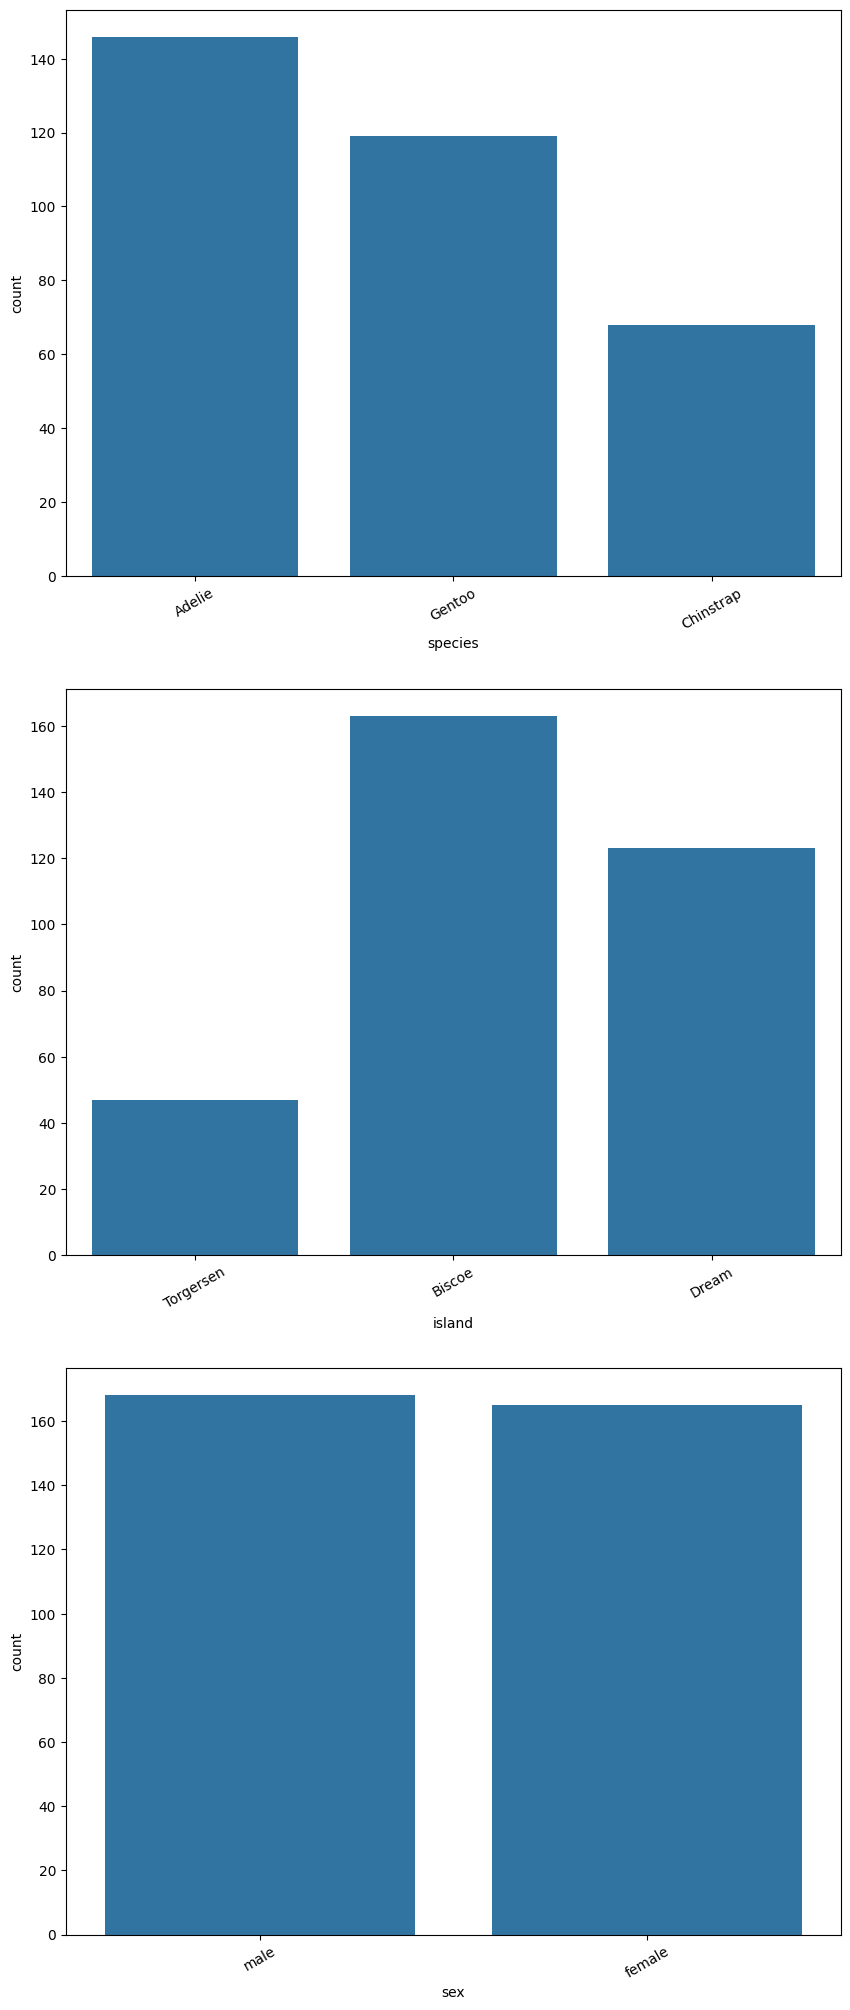

In [53]:
# Graficamos los subniveles de cada variable categorica
columnas_categoricas = ['species', 'island', 'sex']

fir, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 25))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(columnas_categoricas):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

**Observaciones:** En caso que hubieran salido dos subniveles o mas similares con el tittulo, estos se deberia unificar

Si en la columna categorica **sex** hubieran dos subniveles que significaran lo mismo o que estuvieran mal escritos.

Por ejemplo: male y *males*, su unificacion y/o reemplazo seria de la siguiente manera:

print(data['sex'].unique()) >> Mostrar la columna en cuestion antes de la unificacion/reemplazo.

data['sex']=data['sex'].str.replace('males','male', regex=false) >> Unificando/Reemplazando los subniveles.

print(data['sex'].unique()) >> Mostrar la columna en cuestion despues de la unificacion/reemplazo

*Los resultados serian asi:*

['males' 'male' 'female']

['male' 'female'] 

## 4.6 Exportado resultados

Listo, ya se ha completado la fase de limpieza del dataset, que originalmente tenia 344 filas y 9 columnas. El dataset resultante tiene 333 filas y 9 columnas.

El dataset ya esta listo para el Análisis Exploratorio.

In [54]:
# Exportando los resultados en un nuevo archivo CSV
ruta = "../results/dataset_penguins_clean.csv"
data.to_csv(ruta, index=False)